In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load the data set**

In [ ]:
data = pd.read_csv(r'C:\Users\epist\Documents\PYTHON TUTORIALS\SUPERVISED ML CASE STUDY PROJECT\booking - booking.csv')

In [ ]:
# Display the first few rows
data.head(4)

In [ ]:
data.info()

In [ ]:
##NO MISSING VALUE IN THIS DATA 

In [ ]:
data.describe()

**REMOVE IRRELEVANT COLUMNS**

In [ ]:
data.drop("Booking_ID", axis=1, inplace=True)

In [ ]:
data.head(4)

**Checking again if i have any missing value**

In [ ]:
data.isnull().sum()

In [ ]:
##SHOWING THE HR/STAKEHOLDERS THAT THERE ARE NO MISSING VALUES (YOU CAN USE MISSNGNO, OR HEAT MAP)

In [ ]:
import missingno as msno

msno.bar(data, color='skyblue')

In [ ]:
##CHECKING FOR DUPLICATES

In [ ]:
data.duplicated().sum()

In [ ]:
data.shape[0]

In [ ]:
duplicate_count = {
    False: 72,  # Number of unique records
    True: 28     # Number of duplicate records
}

# Now the visualization code
labels = ['Unique Records', 'Duplicate Records']
sizes = [duplicate_count[False], duplicate_count[True]]
colors = ['skyblue', 'salmon']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=(0, 0.1))
plt.title('Proportion of Duplicate Records in Dataset')
plt.axis('equal')
plt.show()

#NOTES
**Approximately 28% of our booking data are duplicates, which can mislead analysis and prediction. By removing these, we ensure more accurate insights and prevent potential bias in business decisions**

**REMOVE DUPLICATE**

In [ ]:
data = data.drop_duplicates().reset_index(drop=True)

In [ ]:
data.duplicated().sum()

In [ ]:
import matplotlib.pyplot as plt

# Data after removing duplicates
data_status = {'Unique Records': 26009, 'Duplicates': 0}

# Pie chart with Sky Blue
colors = ['skyblue', '#ff9999']  # Sky blue for unique, soft red for duplicates

plt.figure(figsize=(6,6))
plt.pie(data_status.values(), labels=data_status.keys(), autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Data Composition After Dropping Duplicates")
plt.axis('equal')  # Equal aspect ratio
plt.show()

**Handle Outliers**
Check for outliers in numerical columns.
Lets investigate the numerical columns for outliers by visualizing their distributions on histplot



In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
ax=ax.flatten()
for idx, col in enumerate(numerical_columns):
    sns.boxplot(data[col], ax=ax[idx])
    ax[idx].set_title(f"Boxplot for {col}")
plt.show()

In [ ]:
numerical_columns = data.select_dtypes(include="number")
# Remove kde parameter from subplots function
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
ax = ax.flatten()
for idx, col in enumerate(numerical_columns):
    # Add kde parameter to histplot function instead
    sns.histplot(data[col], ax=ax[idx], kde=True)
    ax[idx].set_title(f"Histplot for {col}")
plt.show()

***Lets remove the outliers on affected columns using IQR***

In [ ]:
affected_column = ["number of adults", "number of children", "number of weekend nights", "number of week nights", "car parking space","lead time","repeated"
                  ,"P-C","P-not-C","average price","special requests"]

In [ ]:
q1 = data[affected_column].quantile(0.25)
q3 = data[affected_column].quantile(0.75)

In [ ]:
iqr = q3 - q1

In [ ]:
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

In [ ]:
data[affected_column] = data[affected_column].clip(lower=lower_bound, upper=upper_bound, axis=1)

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
ax=ax.flatten()
for idx, col in enumerate(numerical_columns):
    sns.boxplot(data[col], ax=ax[idx])
    ax[idx].set_title(f"Boxplot for {col}")
plt.show()

In [ ]:
data.head()

***Seasonal Trends Analysis***

In [ ]:
data['date of reservation'] = pd.to_datetime(data['date of reservation'], errors='coerce')

In [ ]:
invalid_dates = data[data['date of reservation'].isna()]

In [ ]:
invalid_dates

In [ ]:
invalid_count = data['date of reservation'].isna().sum()
print(f"Number of invalid dates: {invalid_count}")

In [ ]:
data.shape[0]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert to datetime with error handling
data['date of reservation'] = pd.to_datetime(data['date of reservation'], errors='coerce')

# Count invalid and valid dates
invalid_count = data['date of reservation'].isna().sum()
valid_count = data['date of reservation'].notna().sum()

# Create summary DataFrame
date_status = pd.DataFrame({
    'Date Status': ['Valid Dates', 'Invalid Dates'],
    'Count': [valid_count, invalid_count]
})

# Pie chart
plt.figure(figsize=(6,6))
colors = ['skyblue', 'lightcoral']
plt.pie(date_status['Count'], labels=date_status['Date Status'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Date of Reservation Quality Before Cleaning')
plt.axis('equal')
plt.show()

In [ ]:
data = data[data['date of reservation'].notna()]

# Show updated pie chart
plt.figure(figsize=(6,6))
plt.pie([len(data)], labels=['Valid Dates'], autopct='%1.1f%%', startangle=90, colors=['skyblue'])
plt.title('Date of Reservation After Cleaning (All Valid)')
plt.axis('equal')
plt.show()

In [ ]:
data['date of reservation'] = pd.to_datetime(data['date of reservation'])
data['Month'] = data['date of reservation'].dt.strftime('%b')
data.sort_values(by="date of reservation", inplace=True)

In [ ]:
data.head()

# EXPLORATORY DATA ANALYSIS 

# UNIVARIATE

In [ ]:
# 1. Distribution of lead time

plt.figure(figsize=(7, 4))
sns.histplot(data['lead time'], kde=True)
plt.title('Distribution of Lead Time')
plt.show()


Interpretation for Lead Time:
Most customers book just a few days or weeks before their stay.

A smaller group books months in advance, causing the right tail.

It could indicate last-minute bookings are common, while early planners are rare

In [ ]:
# 2. Count of booking status
plt.figure(figsize=(6, 4))
sns.countplot(x='booking status', data=data)
plt.title('Booking Status Count')
plt.show()

 Efficient Booking Experience
The booking process may be clear, easy, and reliable.

Fewer cancellations can reflect a well-optimized user experience (UX).

Cancellation Policies Are Effective
You might have non-refundable, penalized, or limited cancellation windows.

Such policies often discourage casual or impulsive cancellation0

In [ ]:
# 3. Number of Adults distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='number of adults', data=data)
plt.title('Number of Adults per Booking')
plt.show()

 What This Implies:
Two-Person Bookings Are the Norm

Most common travel group is a pair – often couples, friends, or business partners.

This is typical in hospitality. Many hotel rooms are designed for 2 adults.

Room Capacity Matches Demand

Hotels may mostly offer rooms meant for 2 adults, aligning with demand.

Suggests good alignment between supply and market preference.

Less Demand for Solo or Group Bookings

Bookings with 1 adult or 3+ adults are much fewer.

Might indicate hotels are less attractive or optimized for solo travelers or large groups.

Pricing Strategy May Favor Pairs

Prices or promotions may be more affordable for two, making it the “sweet spot”

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='special requests', data=data)
plt.title('Count of Special Requests')
plt.show()

. Most Guests Make No Special Requests
A majority of customers (value 0) did not request anything extra.

Could indicate:

Standard services meet most needs.

Guests are not aware they can make special requests.

Booking platforms don’t emphasize or offer this feature clearly.

#  BIVARIATE ANALYSIS 

In [ ]:
# Sum total weekend and week nights booked
weekend_total = data['number of weekend nights'].sum()
weekday_total = data['number of week nights'].sum()

print(f"Total weekend nights booked: {weekend_total}")
print(f"Total week nights booked: {weekday_total}")

# Visualization to compare
plt.figure(figsize=(6,4))
sns.barplot(x=['Weekend Nights', 'Week Nights'], y=[weekend_total, weekday_total])
plt.title('Total Weekend vs Week Nights Booked')
plt.ylabel('Number of Nights')
plt.show()

What This Means:
More total nights are booked during the weekdays than weekends.

Guests tend to stay more often on weekdays (Monday to Friday) than on weekends (Saturday and Sunday).

In [ ]:
# Extract booking month name
# Extract month name from the reservation date
data['booking_month'] = data['date of reservation'].dt.month_name()

# Calculate total bookings per month (all bookings)
monthly_bookings = data['booking_month'].value_counts().sort_index()

# Calculate total cancellations per month
monthly_cancellations = data.loc[data['booking status'] == 'Cancelled', 'booking_month'].value_counts().sort_index()

# Plot total bookings per month
plt.figure(figsize=(10, 5))
monthly_bookings.plot(kind='bar', color='skyblue')
plt.title('Total Bookings per Month')
plt.ylabel('Number of Bookings')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()



In [ ]:
# Sample data
monthly_cancellations = pd.Series({
    '2023-01': 45,
    '2023-02': 38,
    '2023-03': 52,
    '2023-04': 41,
    '2023-05': 60,
    '2023-06': 55
})

# Convert index to datetime, then get month names
monthly_cancellations.index = pd.to_datetime(monthly_cancellations.index)
monthly_cancellations.index = monthly_cancellations.index.strftime('%B')  # Full month names

# Plot cancellations per month
plt.figure(figsize=(10, 5))
monthly_cancellations.plot(kind='bar', color='salmon')
plt.title('Cancellations per Month')
plt.ylabel('Number of Cancellations')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the month with the highest cancellations
if not monthly_cancellations.empty:
    print(f"Highest cancellation month: {monthly_cancellations.idxmax()} with {monthly_cancellations.max()} cancellations")
else:
    print("No cancellation data available")

In [ ]:
# 2. Average price vs Booking status
plt.figure(figsize=(7, 4))
sns.boxplot(x='booking status', y='average price', data=data)
plt.title('Average Price vs Booking Status')
plt.show()

 Why You See Outliers on Both Upper and Lower Ends:
Upper Outliers (High Prices):

Some bookings cost significantly more than most.

These might be for premium rooms, special packages, or peak-season bookings.

Could indicate luxury customers or special events.

Lower Outliers (Low Prices):

Some bookings have very low prices compared to typical.

May be due to deep discounts, last-minute deals, or budget rooms.

Could also be caused by errors or refunds.

In [ ]:
# 3. Room type vs Booking status
plt.figure(figsize=(7, 4))
sns.countplot(x='room type', hue='booking status', data=data)
plt.title('Room Type by Booking Status')
plt.xticks(rotation=45)
plt.show()

Room type 1 is the most preferred or available option.

Guests mostly book this room type.

It could be because it offers the best value, most comfort, or is the most advertised.

The high count of not canceled bookings for room type 1 also suggests that guests who book this room are more likely to follow through with their stay.

Room type 4 is the second choice but less popular.

Room type 2 and others might be:

Less available,

Less popular due to price, size, or amenities,

Or maybe targeted at niche customers.

In [ ]:
# 4. Special requests vs Booking status
plt.figure(figsize=(7, 4))
sns.countplot(x='special requests', hue='booking status', data=data)
plt.title('Special Requests by Booking Status')
plt.show()

What this suggests:
Guests who made at least 1 special request tend to cancel less.

They might be more engaged or serious about their stay.

Making a request could indicate a higher commitment level.

Guests with no special requests cancel more often.

Some might book casually or be less invested in the stay

In [ ]:
# 5. Market segment type vs Booking status
plt.figure(figsize=(7, 4))
sns.countplot(x='market segment type', hue='booking status', data=data)
plt.title('Market Segment Type by Booking Status')
plt.xticks(rotation=45)
plt.show()

 Possible Reasons:
Ease of Booking and Cancellation Online

Online platforms often allow quick, easy cancellations with fewer penalties.

Guests may book multiple options online and cancel later (“booking shopping”).

Lower Commitment in Online Bookings

Customers booking online may be more price-sensitive or less committed.

Impulsive bookings or uncertain plans can lead to higher cancellations.

Offline Bookings Often Involve More Personal Contact

Travel agents or corporate bookings might require more formal confirmation.

More effort invested by guest leads to higher commitment and fewer cancellations.

Different Cancellation Policies

Online channels might have more flexible cancellation policies.

Offline bookings may have stricter terms.

# MULTIVARIATE ANALYSIS

In [ ]:
# 1. Average price vs Booking status and Room type
plt.figure(figsize=(9, 5))
sns.boxplot(x='room type', y='average price', hue='booking status', data=data)
plt.title('Avg Price by Room Type and Booking Status')
plt.xticks(rotation=45)
plt.show()

It’s a canceled booking with an unusually high average price compared to other canceled bookings in Room Type 1.

Possible interpretations:

High-value cancellations:
Someone booked an expensive or premium option within Room Type 1 but later canceled. This could indicate that high-spending customers sometimes cancel, which can have a bigger revenue impact.

Special packages or add-ons:
The booking might have included costly extras (spa, meals, upgrades) making the price spike unusually high before cancellation.

Data entry errors or refunds:
Occasionally, extreme values are caused by mistakes or late adjustments/refunds.

Business implications:

Revenue risk: High-value cancellations can hurt profitability more than many low-price cancellations combined.

Targeted policies: You might want to review cancellation policies for high-priced bookings (e.g., non-refundable deposits or stricter terms).

Customer follow-up: These customers may be worth contacting for feedback or offering incentives to reduce cancellations.

In [ ]:
# 5. Number of weekend nights vs Booking status and Room type
plt.figure(figsize=(9, 5))
sns.barplot(x='room type', y='number of weekend nights', hue='booking status', data=data)
plt.title('Weekend Nights by Room Type and Booking Status')
plt.xticks(rotation=45)
plt.show()

Higher weekend nights associated with cancellations:

Guests booking more weekend nights are canceling more often than guests booking fewer weekend nights.

This could suggest that weekend plans are more likely to change or be uncertain.

Room type 1, 4, and 2 dominate bookings:

These are your most popular room types, so naturally they show higher booking activity.

Does this mean people cancel more on weekends?

Not necessarily the weekends themselves, but rather longer weekend stays are more likely to be canceled.

Weekend trips might be more subject to last-minute changes, like social plans, events, or weather.

Regarding alcohol influence:

It’s an interesting hypothesis but would need data to support it — like cancellations linked to specific events or nights.

More likely, cancellations on weekend stays are due to factors like event changes, travel complications, or shifting social plans rather than alcohol alone.

📊 Business Implications:
Review weekend cancellation policies: Consider requiring deposits or non-refundable rates for weekend bookings.

Flexible rebooking options: Offer easy rescheduling for weekend stays to retain customers.

Targeted communication: Send reminders or confirmations specifically for weekend bookings.

Analyze cancellations by reason: If possible, gather cancellation reasons to understand the causes better.

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.preprocessing import LabelEncoder

**Encode Categorical Variables**
Convert categorical variables like type of meal, room type, and Market segment type, booking status, and month  into numeric formats.

In [ ]:
# Label encoding for binary categories
label_enc = LabelEncoder()
data['type of meal'] = label_enc.fit_transform(data['type of meal'])  
data['room type'] = label_enc.fit_transform(data['room type'])
data['market segment type'] = label_enc.fit_transform(data['market segment type'])
data['booking status'] = label_enc.fit_transform(data['booking status'])
data['Month'] = label_enc.fit_transform(data['Month'])

In [ ]:
data.head(2)

**SCALING OF THE DATA**
Scale Numerical Features
Scale numerical columns to bring them to a similar range, which can improve model performance.


***STANDARD SCALER--- NORMAL OR SLIGHTLY SKEWED DISTRIBUTION
***MINMAX SCALER----UNIFORM DISTRIBUTION
****ROBUST SCALER-----HEAVILY SKEWED

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
scaler = StandardScaler()
num_cols_to_scale = ['number of adults' ,'number of children','number of weekend nights' ,'number of week nights','lead time',
                     'average price','special requests']
data[num_cols_to_scale] = scaler.fit_transform(data[num_cols_to_scale])

In [ ]:
data.head()

Check Class Distribution
Assess the balance of the target variable (Attrition) to determine if we need to handle class imbalance.

In [ ]:
# Check class distribution
data['booking status'].value_counts()

In [ ]:
data['booking status'].value_counts(normalize=True)*100

In [ ]:
sns.countplot(x=data['booking status'])



###Handling Class Imbalance###
Techniques to Address Class Imbalance
Resampling:
Oversampling the minority class using techniques like SMOTE (Synthetic Minority Oversampling Technique).
Undersampling the majority class to balance proportions.
Class Weights:
Add weights to the classes in the loss function during model training to penalize misclassifications of the minority class.
Evaluation Metrics:
Use metrics like precision, recall, F1-score, or ROC-AUC instead of just accuracy

***Oversampling with SMOTE***

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Separate features and target
X = data.drop('booking status', axis=1)
y = data['booking status']

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
# Extract numeric features from the date
data['reservation_day'] = data['date of reservation'].dt.day
data['reservation_month'] = data['date of reservation'].dt.month
data['reservation_weekday'] = data['date of reservation'].dt.weekday  # Monday=0, Sunday=6

# Now you can drop the original datetime column for modeling
data = data.drop('date of reservation', axis=1)

In [ ]:
data.head()

In [ ]:
X = data.drop('booking status', axis=1)
y = data['booking status']

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
y_resampled.value_counts()

In [ ]:
y_resampled.value_counts(normalize=True)*100

In [ ]:
sns.countplot(x=y_resampled)

In [ ]:
resampled_data = pd.DataFrame(X_resampled,columns= X.columns)

In [ ]:
resampled_data.head()

In [ ]:
resampled_data['booking status'] = y_resampled

In [ ]:
resampled_data

Final Dataset Ready¶
At this stage, the dataset is clean and prepared for the next step in the workflow.



In [ ]:
# Save the cleaned dataset for future use
resampled_data.to_csv('Cleaned_booking-booking.csv', index=False)

In [ ]:
df= pd.read_csv('Cleaned_booking-booking.csv')

In [ ]:
df['booking status'].value_counts()

**Data Splitting**

We’ll split the cleaneddataset into training and testing sets, ensuring the target variable’s distribution is representative in both

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled  # Stratify to maintain class proportions
)

In [ ]:
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

In [ ]:
y_train.value_counts(normalize= True)*100

In [ ]:
y_test.value_counts(normalize= True)*100

***Model Selection***
We’ll train multiple classification models to find the best one for predicting attrition. Start with a baseline and expand to more advanced models.

***1. Train a Baseline Model (Logistic Regression)***

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Train logistic regression model
#MODEL INITIALIZATON 
logreg = LogisticRegression(random_state=42)
# logreg = LogisticRegression(class_weight='balanced', random_state=42)
#MODEL TRAINING 
logreg.fit(X_train, y_train)

In [ ]:
# Predict on the test set
y_pred = logreg.predict(X_test)

In [ ]:
y_pred[:5]

In [ ]:
print(y_test[:5])

In [ ]:
X_test

In [ ]:
# Evaluate performance
print("Logistic Regression Classification Report:\n")
print(classification_report(y_test, y_pred))

In [ ]:
y_test.value_counts()

In [ ]:
len(y_test)

2) # TRAIN ADVANCED MODEL

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Train random forest model
# rf = RandomForestClassifier(class_weight={0:1, 1:3}, random_state=42, n_estimators=100)
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42,n_estimators=100)
rf_model.fit(X_train, y_train)
# Predict on the test set
y_pred_rf = rf_model.predict(X_test)
# Evaluate performance
print("Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf))

# 3 Trying multiple classification models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
 !pip install xgboost


In [ ]:
from xgboost import XGBClassifier

In [ ]:
# Define the models
# class_weights={0:1, 1:3}
class_weights='balanced'
models = {
    'Logistic Regression': LogisticRegression(random_state=42, class_weight=class_weights),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight=class_weights),
    'Support Vector Machine': SVC(random_state=42, class_weight=class_weights),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight=class_weights),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42, algorithm="SAMME"),
    'XGBoost': XGBClassifier(eval_metric='mlogloss')
}

Training Logistic Regression...
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      3707
           1       0.77      0.76      0.77      3707

    accuracy                           0.77      7414
   macro avg       0.77      0.77      0.77      7414
weighted avg       0.77      0.77      0.77      7414



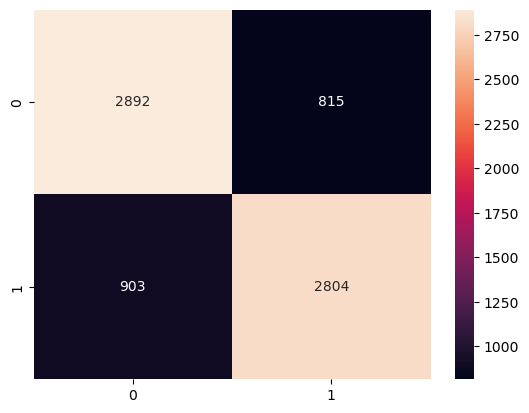

Training Random Forest...
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      3707
           1       0.89      0.90      0.89      3707

    accuracy                           0.89      7414
   macro avg       0.89      0.89      0.89      7414
weighted avg       0.89      0.89      0.89      7414



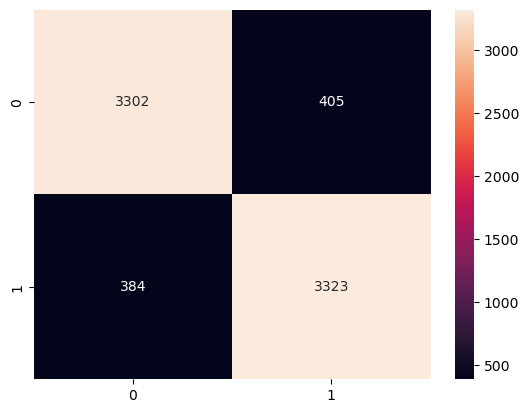

Training Support Vector Machine...
Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78      3707
           1       0.79      0.75      0.77      3707

    accuracy                           0.77      7414
   macro avg       0.77      0.77      0.77      7414
weighted avg       0.77      0.77      0.77      7414



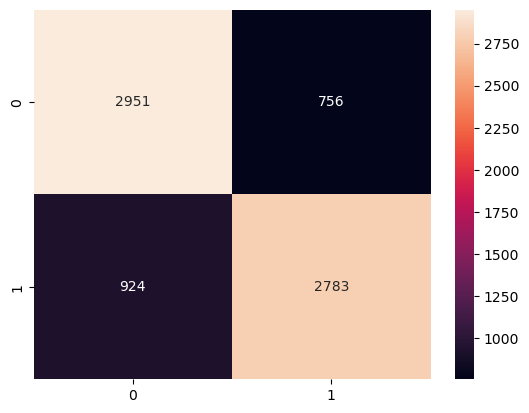

Training k-Nearest Neighbors...
k-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.89      0.81      3707
           1       0.87      0.70      0.77      3707

    accuracy                           0.80      7414
   macro avg       0.81      0.80      0.79      7414
weighted avg       0.81      0.80      0.79      7414



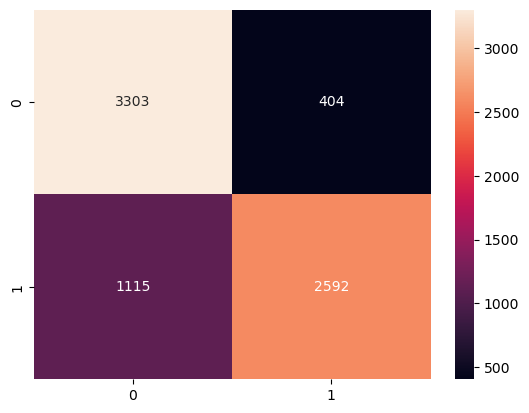

Training Decision Tree...
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      3707
           1       0.84      0.83      0.84      3707

    accuracy                           0.84      7414
   macro avg       0.84      0.84      0.84      7414
weighted avg       0.84      0.84      0.84      7414



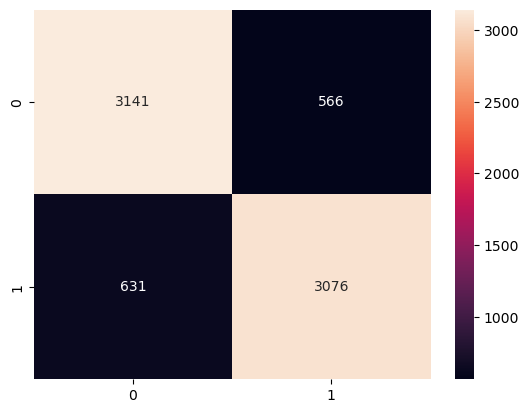

Training Gradient Boosting...
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      3707
           1       0.84      0.87      0.86      3707

    accuracy                           0.86      7414
   macro avg       0.86      0.86      0.86      7414
weighted avg       0.86      0.86      0.86      7414



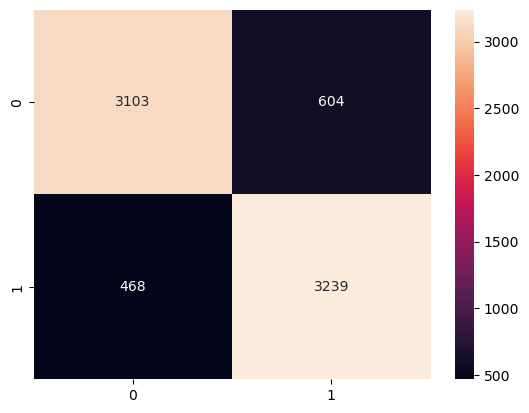

Training AdaBoost...
AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      3707
           1       0.80      0.81      0.80      3707

    accuracy                           0.80      7414
   macro avg       0.80      0.80      0.80      7414
weighted avg       0.80      0.80      0.80      7414



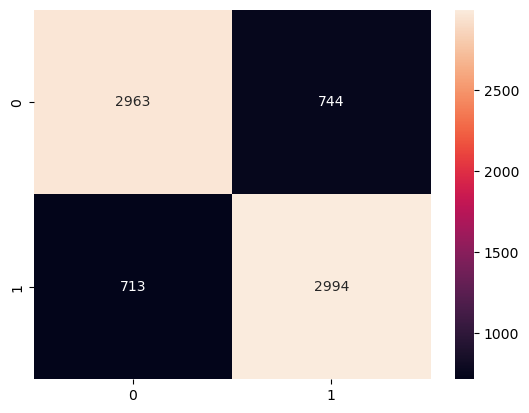

Training XGBoost...
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      3707
           1       0.88      0.89      0.88      3707

    accuracy                           0.88      7414
   macro avg       0.88      0.88      0.88      7414
weighted avg       0.88      0.88      0.88      7414



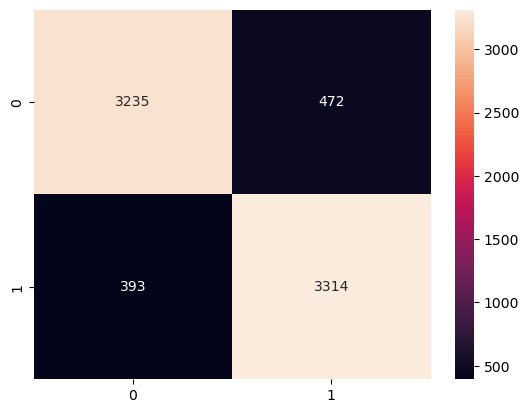

In [87]:
from sklearn.metrics import classification_report, accuracy_score

results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    
    # Store results
    results[model_name] = {
        'accuracy': accuracy,
        'classification_report': report,
        'confusion_matrix': matrix
    }
    # print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(f"{model_name} Classification Report:\n{report}")

    sns.heatmap(matrix, annot=True, fmt="g")
    plt.show()

## Hyperparameter Tuning
We’ll use grid search to optimize hyperparameters for the Random Forest model.

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [90]:
grid_search = GridSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid, cv=5, scoring='f1', n_jobs=-1
)

In [91]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1')

In [92]:
# Best parameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [93]:
# Train best model
best_rf = grid_search.best_estimator_

In [94]:
# Predict on the test set
y_pred_best_rf = best_rf.predict(X_test)

In [95]:
# Evaluate performance
print("Tuned Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_best_rf))

Tuned Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      3707
           1       0.89      0.90      0.90      3707

    accuracy                           0.90      7414
   macro avg       0.90      0.90      0.90      7414
weighted avg       0.90      0.90      0.90      7414



# Model Evaluation
We’ll perform a detailed evaluation using metrics like precision, recall, F1-score, and AUC-ROC. Confusion matrices and AUC curves will help visualize performance.

# Confusion Matrix
Confusion matrix to visualize misclassifications.

In [96]:
from sklearn.metrics import confusion_matrix

In [97]:
conf_matrix = confusion_matrix(y_test, y_pred_best_rf)

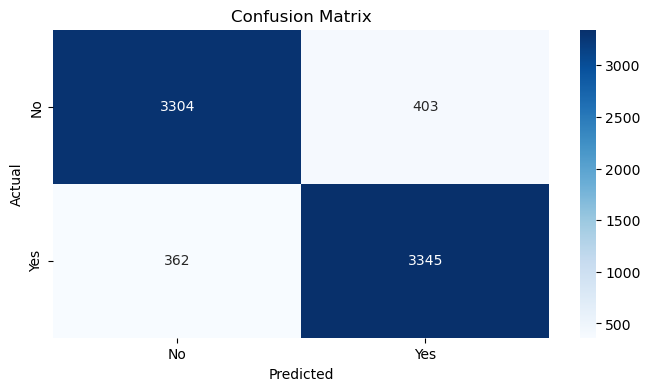

In [98]:
# Plot the confusion matrix
plt.figure(figsize=(8, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve and AUC Score
ROC-AUC to evaluate the model's ability to distinguish between classes

In [99]:
from sklearn.metrics import roc_curve, roc_auc_score

In [101]:
# Compute probabilities for ROC
y_probs = best_rf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

In [103]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

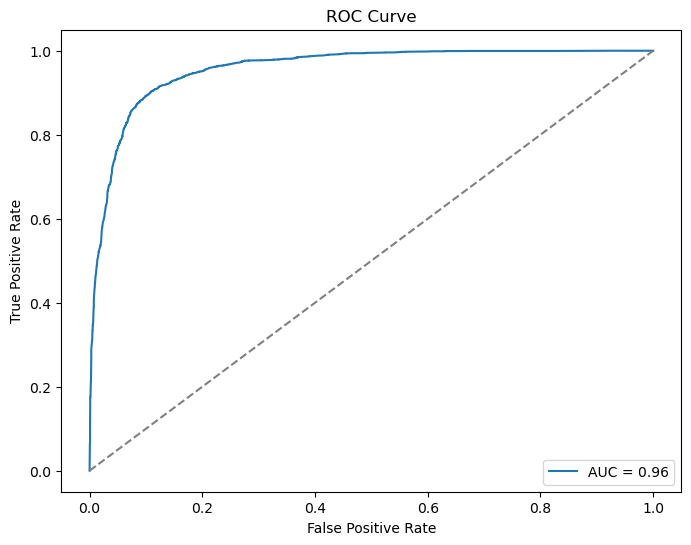

In [104]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# Using AutoML to select best model
Using PyCaret
PyCaret is a low-code library for automating machine learning workflows.

In [116]:
import sys
print(sys.version)

3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]


In [2]:
from pycaret.classification import *